In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = pd.DataFrame({
    'N': [90, 85, 60, 55, 40, 70, 110, 50, 95, 45],
    'P': [40, 35, 60, 20, 30, 55, 25, 50, 38, 28],
    'K': [40, 30, 55, 20, 25, 45, 30, 40, 35, 22],
    'pH': [6.5, 6.8, 5.5, 7.0, 5.8, 6.2, 6.7, 5.9, 6.4, 6.0],
    'rainfall': [200, 180, 300, 120, 250, 150, 220, 140, 210, 160],
    'temperature': [28, 24, 32, 30, 35, 25, 29, 31, 27, 26],
    'humidity': [80, 70, 85, 60, 75, 65, 78, 68, 82, 72],
    'crop': ['rice', 'wheat', 'sugarcane', 'millet', 'cotton', 'maize', 'rice', 'wheat', 'rice', 'maize']
})

print(" Dataset Loaded Successfully")
print(data.head())

 Dataset Loaded Successfully
    N   P   K   pH  rainfall  temperature  humidity       crop
0  90  40  40  6.5       200           28        80       rice
1  85  35  30  6.8       180           24        70      wheat
2  60  60  55  5.5       300           32        85  sugarcane
3  55  20  20  7.0       120           30        60     millet
4  40  30  25  5.8       250           35        75     cotton


In [4]:
X = data.drop('crop', axis=1)
y = data['crop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)
print("\n Model Accuracy:", accuracy_score(y_test, y_pred))

print("\n Classification Report:\n",
      classification_report(y_test, y_pred, zero_division=0))


 Model Accuracy: 0.3333333333333333

 Classification Report:
               precision    recall  f1-score   support

       maize       0.00      0.00      0.00         1
        rice       0.50      1.00      0.67         1
       wheat       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.17      0.33      0.22         3
weighted avg       0.17      0.33      0.22         3



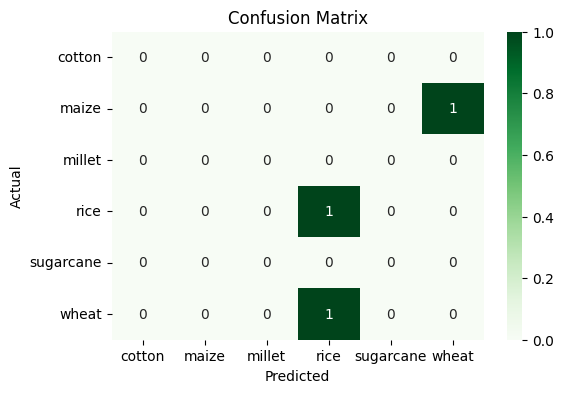

In [14]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

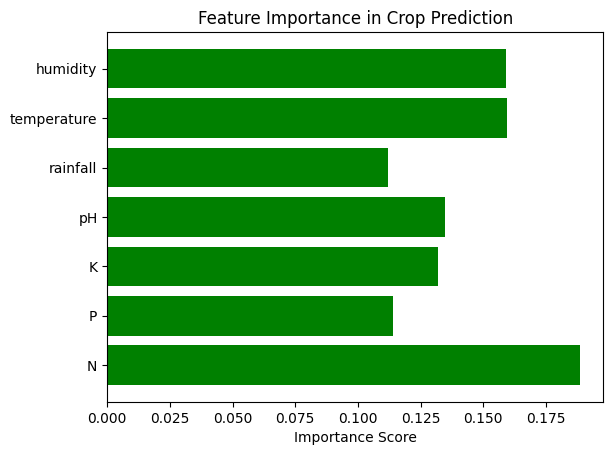

In [15]:
importances = model.feature_importances_
features = X.columns
plt.barh(features, importances, color="green")
plt.xlabel("Importance Score")
plt.title("Feature Importance in Crop Prediction")
plt.show()

In [16]:
sample = pd.DataFrame([[85, 40, 35, 6.7, 190, 27, 75]],
columns=['N','P','K','pH','rainfall','temperature','humidity'])

predicted_crop = model.predict(sample)[0]
print("\n Recommended Crop for given values:", predicted_crop)


 Recommended Crop for given values: rice


In [18]:
import joblib

# Save model
joblib.dump(model, "crop_advisor_model.pkl")
print(" Model saved successfully!")

# Load model
loaded_model = joblib.load("crop_advisor_model.pkl")

# Test prediction with loaded model
predicted_crop = loaded_model.predict(sample)[0]
print("\n Recommended Crop (from saved model):", predicted_crop)

 Model saved successfully!

 Recommended Crop (from saved model): rice
